In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import pandas as pd
import matplotlib.pyplot as plt
import os 
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# Wczytaj zbiór MNIST i znormalizuj dane (jak na poprzednich zajęciach)
# Stwórz dwa modele. Każdy z nich powinien mieć dwie warstwy ukryte o 64 neuronach. 
# Różnica polega na dodaniu w jednym z modeli argumentu do każdej warstwy ukrytej (Dense) -
# kernel_regularizer=l2(0.001).
# Wytrenuj oba modele
# Stórz wykresy porównujące val_acc i acc obu modeli

regularyzacja - dodatkowy współczynnik, uspokaja sieci i robi mniejsze kroki, szybciej szuka optimum (???)

jak licymy sobie loss to jak dorzyc regularyzacje to ona powoduje że ten błąd ma dodatkowy współczynnik. Współczynnik który karze siec za to żema duże wartości wagi
służy wiec do tego żeby naszą szaloną siec uspokoic

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [3]:
es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)
EPOCHS = 100

In [4]:
model = Sequential()
model.add(Flatten(input_shape=(28,28))) 
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(x_train, y_train, epochs=EPOCHS, validation_data=(x_test, y_test), callbacks = [es])
hist = pd.DataFrame(history.history)

Epoch 1/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2790 - accuracy: 0.9192 - val_loss: 0.1530 - val_accuracy: 0.9532
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1255 - accuracy: 0.9613 - val_loss: 0.1247 - val_accuracy: 0.9616
Epoch 3/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0906 - accuracy: 0.9715 - val_loss: 0.0996 - val_accuracy: 0.9709
Epoch 4/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0707 - accuracy: 0.9775 - val_loss: 0.1010 - val_accuracy: 0.9702
Epoch 5/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0579 - accuracy: 0.9815 - val_loss: 0.0972 - val_accuracy: 0.9708
Epoch 6/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0488 - accuracy: 0.9840 - val_loss: 0.1033 - val_accuracy: 0.9706
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0414 - accuracy: 0.9863 - val_loss: 0.1021 - val_ac

In [6]:
model1 = Sequential()
model1.add(Flatten(input_shape=(28,28))) 
model1.add(Dense(64, activation = 'relu', kernel_regularizer=l2(0.001)))
model1.add(Dense(64, activation = 'relu', kernel_regularizer=l2(0.001)))
model1.add(Dense(10, activation = 'softmax'))

model1.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [7]:
history1 = model1.fit(x_train, y_train, epochs=EPOCHS, validation_data=(x_test, y_test), callbacks = [es])
hist1 = pd.DataFrame(history1.history)

Epoch 1/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4140 - accuracy: 0.9174 - val_loss: 0.2751 - val_accuracy: 0.9530
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2570 - accuracy: 0.9568 - val_loss: 0.2407 - val_accuracy: 0.9589
Epoch 3/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2228 - accuracy: 0.9638 - val_loss: 0.2071 - val_accuracy: 0.9668
Epoch 4/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2039 - accuracy: 0.9675 - val_loss: 0.1973 - val_accuracy: 0.9679
Epoch 5/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1917 - accuracy: 0.9693 - val_loss: 0.1977 - val_accuracy: 0.9657
Epoch 6/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1797 - accuracy: 0.9720 - val_loss: 0.1870 - val_accuracy: 0.9696
Epoch 7/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1749 - accuracy: 0.9720 - val_loss: 0.1703 - val_ac

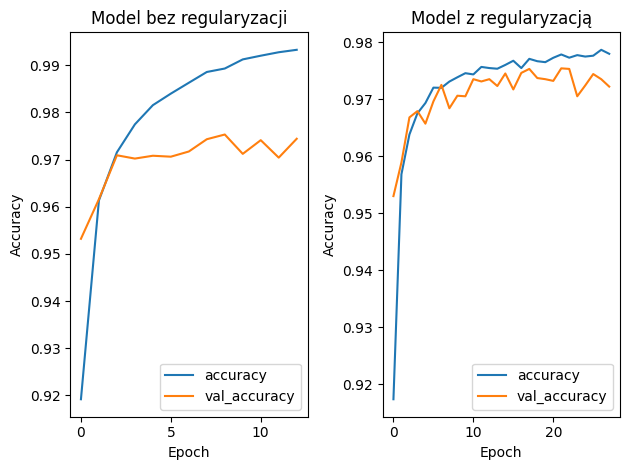

In [9]:
plt.subplot(1,2,1)
plt.plot(hist.accuracy, label = "accuracy")
plt.plot(hist.val_accuracy, label = "val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title('Model bez regularyzacji')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist1.accuracy, label = "accuracy")
plt.plot(hist1.val_accuracy, label = "val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title('Model z regularyzacją')
plt.legend()

plt.tight_layout()
plt.show()